In [21]:
import sys
!{sys.executable} -m pip install -r requirements.txt

You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.


In [25]:
from unet.model import *
from unet.data import *

Train Unet with EAT Data
----

### Train with data generator

In [28]:
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')
generator = trainGenerator(8,'../Training Data','AllImages','AllMasks',data_gen_args,save_to_dir = None, image_color_mode = 'rgb')
model = unet()
model_checkpoint = ModelCheckpoint('unet_EAT.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(generator,steps_per_epoch=90,epochs=5,callbacks=[model_checkpoint])

<ipython-input-28-8ac4eb45eaed>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,steps_per_epoch=90,epochs=5,callbacks=[model_checkpoint])


Found 710 images belonging to 1 classes.
Found 710 images belonging to 1 classes.
Epoch 1/5
90/90 [==============================] - ETA: 0s - loss: 0.2927 - accuracy: 0.9518
Epoch 00001: loss improved from inf to 0.29268, saving model to unet_EAT.hdf5
90/90 [==============================] - 58s 559ms/step - loss: 0.2927 - accuracy: 0.9518
Epoch 2/5
90/90 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9627
Epoch 00002: loss improved from 0.29268 to 0.07193, saving model to unet_EAT.hdf5
90/90 [==============================] - 46s 513ms/step - loss: 0.0719 - accuracy: 0.9627
Epoch 3/5
90/90 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9630
Epoch 00003: loss improved from 0.07193 to 0.05449, saving model to unet_EAT.hdf5
90/90 [==============================] - 46s 510ms/step - loss: 0.0545 - accuracy: 0.9630
Epoch 4/5
90/90 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9717
Epoch 00004: loss improved from 0.

Test Model
----

In [50]:
def generateTestsFromPath(test_path, target_size = (256,256)):
    images = os.listdir(test_path)
    for i in images:
        img = io.imread(test_path +"/" +i, as_gray = False)
        img = img / 255
        img = trans.resize(img,(256,256))
        img = img[:,:,0:3]
        img = np.reshape(img,(1,)+img.shape)
        yield img

def saveResults(results,save_path):
    shape = results.shape
    for i in range(0,shape[0]):
        result = results[i,:,:,0] * ((2**8)-1)
        resultRGB = np.zeros((shape[1],shape[2],3))
        resultRGB[:,:,0] = result
        resultRGB[:,:,1] = result
        resultRGB[:,:,2] = result
        matplotlib.image.imsave(os.path.join(save_path,"%d_predict.png"%i), resultRGB.astype(np.uint8))

gen = generateTestsFromPath("../Test Data/AllImages")
model = unet()
model.load_weights("unet_EAT.hdf5")
results = model.predict_generator(gen,verbose=1)
saveResults(results, "../Test Data/AllMasks")

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-50-cc6db0cafe29>:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(gen,verbose=1)


857/857 [==============================] - 54s 63ms/step


In [49]:
shape = results.shape
result = results[0,:,:,0] * ((2**8)-1)
resultRGB = np.zeros((shape[1],shape[2],3))
resultRGB[:,:,0] = result
resultRGB[:,:,1] = result
resultRGB[:,:,2] = result
resultRGB.shape

(256, 256, 3)

In [33]:
import matplotlib.pylab as plt
import skimage.io as io

model = unet()
model.load_weights("unet_EAT.hdf5")
test_path = "../Test Data/AllImages/15.png"

img = io.imread(test_path,as_gray = False)
img = img / 255
img = trans.resize(img,(256,256))
img = img[:,:,0:3]
img = np.reshape(img,(1,)+img.shape)
result = model.predict(img)

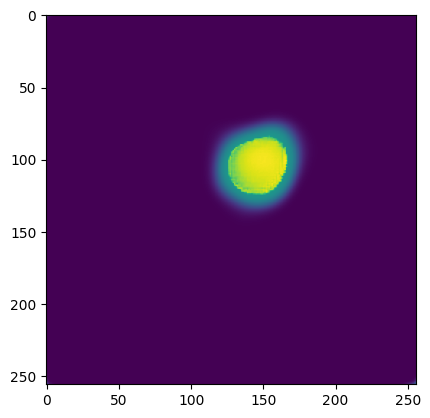

In [32]:
plt.imshow(result[0,:,:,0])
plt.show()